In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:,1].reshape((-1,1))
t = df[:,2].reshape((-1,1))


In [70]:
t = np.array(t).ravel()
t

array([0.117, 1.721, 2.021, 2.489, 3.348, 3.215, 4.141, 3.929, 4.047,
       3.805, 4.271, 4.722, 4.691, 4.388])

In [71]:
x = np.array(x).ravel()
x

array([ 1.,  6., 11., 16., 21., 26., 61., 66., 71., 76., 81., 86., 91.,
       96.])

0 & 2.883
1 & 1.562 & 0.037
2 & 0.443 & 0.153 & -0.001
3 & 0.201 & 0.200 & -0.003 & 0.000
4 & -0.036 & 0.287 & -0.009 & 0.000 & -0.000
5 & -0.104 & 0.328 & -0.014 & 0.000 & -0.000 & 0.000
6 & -0.271 & 0.464 & -0.035 & 0.002 & -0.000 & 0.000 & -0.000
7 & -0.388 & 0.596 & -0.064 & 0.004 & -0.000 & 0.000 & -0.000 & 0.000
8 & -1.011 & 1.360 & -0.260 & 0.024 & -0.001 & 0.000 & -0.000 & 0.000 & -0.000
9 & -0.179 & 0.211 & 0.109 & -0.026 & 0.002 & -0.000 & 0.000 & -0.000 & 0.000 & -0.000
10 & -0.336 & 0.440 & 0.024 & -0.012 & 0.001 & -0.000 & 0.000 & 0.000 & -0.000 & 0.000 & -0.000


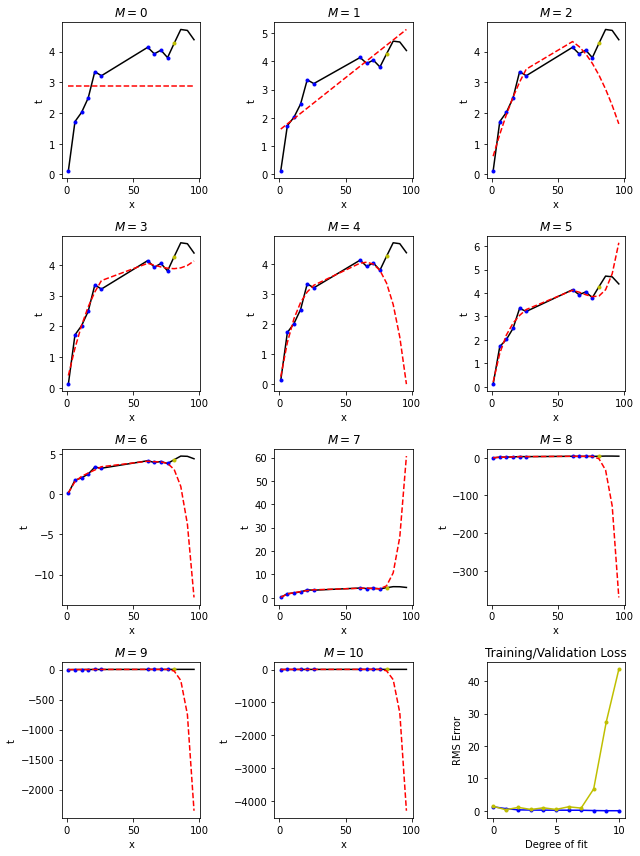

In [72]:
import matplotlib.pyplot as plt
xtrain = x[0:10]
ttrain = t[0:10]
# The validation set
xvalid = x[10::14]
tvalid = t[10::14]
# The test set
#xtest = x[6::10]
#ttest = t[6::10]

# Maximum degree of fit
M = 11
# Empty list to record the RMS errors
rmstrain = []
rmsvalid = []
# Empty list to record the weights for each regression run
weights = []
plt.figure(figsize=[9,12])
# For each degree of polynomial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    PhiTrain = np.array([pow(xtrain,j) for j in range(0,i+1)]).transpose()
    PhiValid = np.array([pow(xvalid,j) for j in range(0,i+1)]).transpose()
    #PhiTest = np.array([pow(xtest,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial smoothly
    hiPhi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrain))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    ytrain = np.matmul(PhiTrain,w)
    yvalid = np.matmul(PhiValid,w)
    # compute the RMS error
    rmstrain.append(np.sqrt(np.sum(pow(ttrain-ytrain,2)/xtrain.size)))
    rmsvalid.append(np.sqrt(np.sum(pow(tvalid-yvalid,2)/xvalid.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    plt.subplot(4,3,i+1)
    plt.plot(x,t,'k-')
    plt.plot(xtrain,ttrain,'b.')
    plt.plot(xvalid,tvalid,'y.')
   #plt.plot(xtest,ttest,'r.')
    plt.plot(x,np.matmul(hiPhi,w),'r--')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(fr'$M={i}$')
# Plot the error curve
plt.subplot(4,3,M+1)
plt.plot(rmstrain,'b.-')
plt.plot(rmsvalid,'y.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.title('Training/Validation Loss')
plt.tight_layout()
plt.savefig('polyfit-sin-11-validation.png')
# Print out the weights
for i,w in enumerate(weights):
    print(str(i) + ' & ' + ' & '.join(['{:5.3f}'.format(i) for i in w]))    

In [73]:
polyorder = 3
PhiTrain = np.array([pow(xtrain,j) for j in range(0,polyorder+1)]).transpose()
PhiValid = np.array([pow(xvalid,j) for j in range(0,polyorder+1)]).transpose()
#PhiTest = np.array([pow(xtest,j) for j in range(0,polyorder+1)]).transpose()
# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrain))
# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
yvalid = np.matmul(PhiValid,w)
#ytest = np.matmul(PhiTest,w)
# compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrain-ytrain,2)/xtrain.size))
validation_loss = np.sqrt(np.sum(pow(tvalid-yvalid,2)/xvalid.size))
#test_loss = np.sqrt(np.sum(pow(ttest-ytest,2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Validation loss = {validation_loss:.2f}")
#print(f"Test loss = {test_loss:.2f}")

Training loss = 0.21
Validation loss = 0.39


Order & Train & Valid \\
0 & 1.207 & 1.348
1 & 0.586 & 0.696
2 & 0.217 & 0.430
3 & 0.174 & 0.400
4 & 0.137 & 0.589
5 & 0.000 & 2.258
6 & 0.000 & 2.257
7 & 0.000 & 7.061


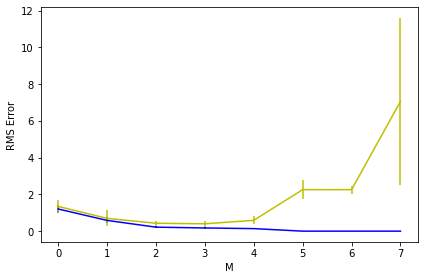

In [74]:
# Construct the dataset
# the combined data for cross-validation 21 pts: 0, 5, 10,..., 95, 100
xtrainval = x[0:9]
ttrainval = t[0:9]
# a test set of 10 pts: 3, 13, 23, ..., 93
xtest = x[9:14]
ttest = t[9::14]

# We now split the dataset into five random folds

# First, combine the x and t data into a single array
trainval = np.concatenate([np.atleast_2d(xtrainval).T,np.atleast_2d(ttrainval).T],axis=1)

# Randomise the order
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.
Folds = [ trainval[0:3], trainval[3:6], trainval[6:9] ]

M = [0,1,2,3,4,5,6,7] # max polynomial order set to 7 because the training 
K = 3 # number of folds
rmstrain = [] # error on the training folds
rmsvalid = [] # RMS error on the validation fold
stdtrain = [] # standard deviation over the training sets
stdvalid = [] # standard deviation over the validation sets

for i in M:
    # Record the performance on the folds
    train_loss = []
    validation_loss = []
    for j in range(K):
        # Select the one validation fold
        Valid = Folds[j]
        # Select and combine the K-1 training folds
        Train = np.concatenate(Folds[:j]+Folds[j+1:])
        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:,0],j) for j in range(0,i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:,0],j) for j in range(0,i+1)]).transpose()
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),Train[:,1]))
        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:,1]-np.matmul(PhiValid,w),2))))
    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss))    
    
plt.figure()
plt.errorbar(M,rmstrain,fmt='b-',yerr=stdtrain,label="Train")
plt.errorbar(M,rmsvalid,fmt='y-',yerr=stdvalid,label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('cross-validation-loss.png')

print("Order & Train & Valid \\\\")
for i in M:
    print(f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f}")

Training loss = 0.21
Test loss = 1.11
[[ 0.162  0.212 -0.004  0.   ]]


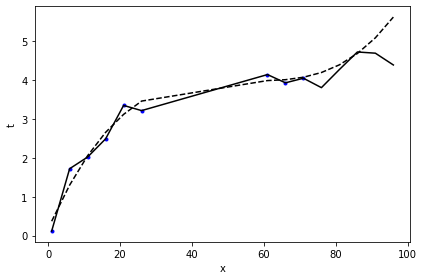

In [75]:
# Recompute the basis for the cubic model
polyorder = 3
PhiTrain = np.array([pow(xtrainval,j) for j in range(0,polyorder+1)]).transpose()
PhiTest = np.array([pow(xtest,j) for j in range(0,polyorder+1)]).transpose()
hiPhi = np.array([pow(x,j) for j in range(0,polyorder+1)]).transpose()

weights = []
# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrainval))
weights.append(w)
# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
ytest = np.matmul(PhiTest,w)
# compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrainval-ytrain,2)/xtrainval.size))
test_loss = np.sqrt(np.sum(pow(ttest-ytest,2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Test loss = {test_loss:.2f}")
print(np.around(weights, 3))
# Plot the data
plt.figure()
plt.plot(xtrainval,ttrainval,'b.')
#plt.plot(xtest,ttest,'r.')
plt.plot(x,t,'k-')
plt.plot(x,np.matmul(hiPhi,w),'k--')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.savefig('cross-validation-result.png')

In [76]:
Npts = 20
sigma = 0.1

#Phi = np.concatenate((np.ones((Npts,1)),x),axis=1)
#wtrue = np.array([0.3,-0.5])
#h = np.matmul(Phi,wtrue)
#t = h + sigma*np.random.randn(Npts)

In [77]:
x

array([ 1.,  6., 11., 16., 21., 26., 61., 66., 71., 76., 81., 86., 91.,
       96.])

In [78]:
y = np.array([31,36,41,46,51,56])

In [79]:
z = np.insert(x, 6, y, axis=None)

In [80]:
z

array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51., 56., 61.,
       66., 71., 76., 81., 86., 91., 96.])

In [81]:
x = z

In [104]:
Npts = 20
sigma = 0.1
x = np.atleast_2d(x)
Phi = np.concatenate((np.ones((Npts,1)),x, x**2, x**3),axis=1)


In [105]:
x

array([[ 1.],
       [ 6.],
       [11.],
       [16.],
       [21.],
       [26.],
       [31.],
       [36.],
       [41.],
       [46.],
       [51.],
       [56.],
       [61.],
       [66.],
       [71.],
       [76.],
       [81.],
       [86.],
       [91.],
       [96.]])

In [100]:
Phi

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02],
       [1.00000e+00, 1.10000e+01, 1.21000e+02, 1.33100e+03],
       [1.00000e+00, 1.60000e+01, 2.56000e+02, 4.09600e+03],
       [1.00000e+00, 2.10000e+01, 4.41000e+02, 9.26100e+03],
       [1.00000e+00, 2.60000e+01, 6.76000e+02, 1.75760e+04],
       [1.00000e+00, 3.10000e+01, 9.61000e+02, 2.97910e+04],
       [1.00000e+00, 3.60000e+01, 1.29600e+03, 4.66560e+04],
       [1.00000e+00, 4.10000e+01, 1.68100e+03, 6.89210e+04],
       [1.00000e+00, 4.60000e+01, 2.11600e+03, 9.73360e+04],
       [1.00000e+00, 5.10000e+01, 2.60100e+03, 1.32651e+05],
       [1.00000e+00, 5.60000e+01, 3.13600e+03, 1.75616e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.60000e+01, 5.77600e+03, 4.38976e+05],
       [1.00000e+00, 8.1

In [101]:
g = sigma*np.random.randn(Npts)

In [94]:
g

array([-0.00870026,  0.18569791, -0.0230255 ,  0.02269654,  0.06593318,
        0.05757798, -0.04464206, -0.04523455, -0.03838711,  0.05018088,
        0.11549593,  0.0895204 , -0.03096539, -0.07370247,  0.10134298,
       -0.12393108, -0.12833794, -0.01807379,  0.04036276, -0.13636331])

In [102]:
wtrue = np.array([0.162, 0.212, -0.004, 0. ])
h = np.matmul(Phi,wtrue)
t = h + sigma*np.random.randn(Npts)

In [124]:
f















    







    